In [1]:
using Plots
using LinearAlgebra
using LaTeXStrings
using StatsBase
using CSV
using DataFrames

In [2]:
t_start = time();

## Parameters:

In [3]:
t0 = 1.0;
t = 1.0;
m_0 = -1.0;
Delta = 1.0;
x_periodic = 0;
y_periodic = 0;

L = 60;

Lx = L;
Ly = L;

exportdata=1;

Equation of two lines are $y = mx + c_1$ and $y = mx + c_2$

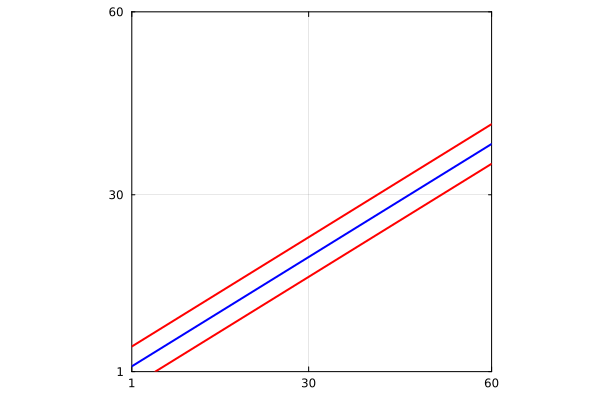

In [4]:
m = (-1+sqrt(5))/2
# m=2/3;
c1 = -2
c2 = 4.5

# c1 = -4;
# c2 = 6;

function line_down(x::Float64)
    return c1 + m*x
end

function line_up(x::Float64)
    return c2 + m*x
end

function line_middle(x::Float64)
    return (line_up(x) + line_down(x))/2
end

line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plt00= plot(line_x,line_down_y,color="red",width=2, xlims=(1,Lx),ylims=(1,Ly),legend=:none,aspect_ratio=:equal,frame=:box, framestyle=:thick,xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly])
plt00=plot!(line_x,line_up_y,color="red",width=2)
plt00=plot!(line_x,line_middle.(line_x),color="blue",width=2)

In [5]:
points_x_array = range(1, L,L)
points_y_array = range(1, L,L)

points2 = zeros(2*L^2)
for ii = 1:L
    for jj = 1:L
        points2[2*((jj-1)*L+ii)-1] = points_x_array[ii]
        points2[2*((jj-1)*L+ii)] = points_y_array[jj]
    end
end


### These arrays have N^2 elements, and hold the x and y coordinates of nth site
points_x_array = points2[1:2:end]
points_y_array =  points2[2:2:end]

site_index = range(1,L^2, L^2)

1.0:1.0:3600.0

### Now we isolate the PTB points

### The array PTB_index (with number of elements N_PTB) contains the parent lattice indices contained in PTB

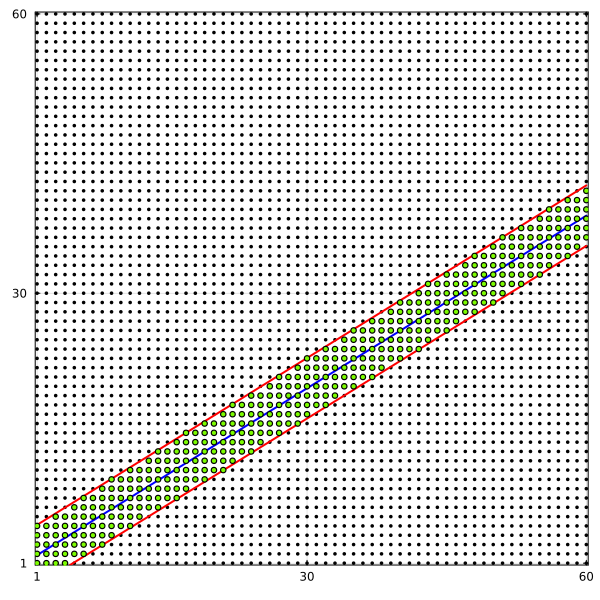

In [6]:
### PTB_index will contain ordered indices of the sites in PTB

PTB_index_dummy = collect(range(1,L^2,L^2))
for ii = 1:L^2
    if (points_y_array[ii] >= line_down(points_x_array[ii])) && (points_y_array[ii] <= line_up(points_x_array[ii]))
        ## Do nothing
    else
        PTB_index_dummy[ii] = 0.0
    end
end

## Here we store non-zero indices
PTB_index = findall(!iszero, PTB_index_dummy)

N_PTB = size(PTB_index)[1]

points_PTB_array_x = zeros(N_PTB)
points_PTB_array_y = zeros(N_PTB)

for ii = 1:N_PTB
    points_PTB_array_x[ii] = points_x_array[PTB_index[ii]]
    points_PTB_array_y[ii] = points_y_array[PTB_index[ii]]
end

### Draw lines separating PTB
line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plt_lattice=scatter(points_x_array, points_y_array,aspect_ratio=1,legend=false, 
                    xlims=[0.8,L+0.2], ylims=[0.8,L+0.2],color="black",markersize=2, frame=:box, framestyle=:thick, xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly], size=(600,600))
plt_lattice=plot!(line_x,line_down_y,color="red",width=2)
plt_lattice=plot!(line_x,line_up_y,color="red",width=2)
plt_lattice=plot!(line_x,line_middle.(line_x),color="blue",width=2)
plt_lattice=scatter!(points_PTB_array_x, points_PTB_array_y,color="lawngreen",aspect_ratio=1,legend=false,markersize=3)

## Percentage of sites in PTB

In [7]:
println("Number of sites in PTB = ",N_PTB)
println("Amount of sites in PTB = ",100* N_PTB/L^2, " %")

Number of sites in PTB = 386
Amount of sites in PTB = 10.722222222222221 %


In [824]:
println(PTB_index)

[1, 2, 3, 33, 34, 35, 36, 65, 66, 67, 68, 69, 70, 99, 100, 101, 102, 103, 104, 132, 133, 134, 135, 136, 137, 166, 167, 168, 169, 170, 171, 199, 200, 201, 202, 203, 204, 233, 234, 235, 236, 237, 238, 267, 268, 269, 270, 271, 272, 300, 301, 302, 303, 304, 305, 334, 335, 336, 337, 338, 339, 368, 369, 370, 371, 372, 373, 401, 402, 403, 404, 405, 406, 435, 436, 437, 438, 439, 440, 468, 469, 470, 471, 472, 473, 502, 503, 504, 505, 506, 507, 536, 537, 538, 539, 540, 541, 569, 570, 571, 572, 573, 574, 603, 604, 605, 606, 607, 608, 636, 637, 638, 639, 640, 670, 671, 672, 704]


## Coordinates of projected sites

### Equation of line_down is $y=mx + c_1$
### Equation of projector line is, $y-y_1 = (-1/m).(x-x_1)$, where $(x_1,y_1)$ is the coordinate of the site
### The two lines intersect at $((m.y_1 + x_1 - m.c_1)/(m^2 + 1), (m^2.y_1 + m.x_1 + c_1)/(m^2 + 1))$

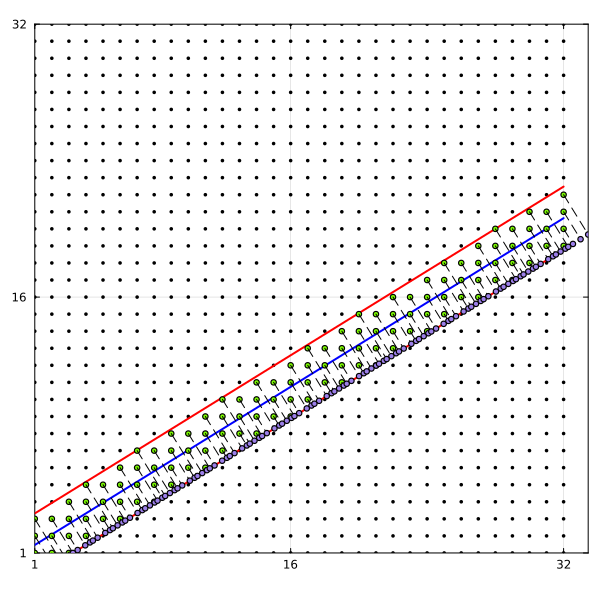

In [825]:
projected_points_PTB_array_x = (m*points_PTB_array_y + points_PTB_array_x - m*ones(N_PTB)*c1)/(m^2 + 1);
projected_points_PTB_array_y = m*projected_points_PTB_array_x + c1 * ones(N_PTB);

## This array contains distance along the line
## This should be x coordinates on the line * sec(theta), where the slope is tan(theta) = m
distance_along_projected_line = projected_points_PTB_array_x * sqrt(m^2 +1)

for ii = 1:N_PTB
    line_projected_x = [points_PTB_array_x[ii],projected_points_PTB_array_x[ii]]
    line_projected_y = [points_PTB_array_y[ii],projected_points_PTB_array_y[ii]]
    plt_lattice=plot!(line_projected_x,line_projected_y,linestyle=:dash, color="black")
end
plt_lattice=scatter!(projected_points_PTB_array_x,projected_points_PTB_array_y, 
            xlims=(1,maximum(vcat(projected_points_PTB_array_x,Lx))), ylims=(1,maximum(vcat(projected_points_PTB_array_y,Ly))), markersize=3)
display(plt_lattice)

## Generate Parent Hamiltonian

In [826]:
include("generate_matrices1D.jl")
include("generate_matrices2D.jl")
include("angmom.jl")

generate_spin_matrices (generic function with 1 method)

In [827]:
println("t = ",t)
println("m_0 = ", m_0)
println("Delta = ",Delta)
println("Lx = ", Lx)
println("Ly = ", Ly)

t = 1.0
m_0 = -1.0
Delta = 1.0
Lx = 32
Ly = 32


In [828]:
if(x_periodic^2 != x_periodic || y_periodic^2 != y_periodic)
    println("x_periodic and y_periodic must be 0 or 1")
    println("You entered x_periodic = ", x_periodic, " y_periodic = ", y_periodic)
    return
end

In [829]:
sigma_x = [0 1;
           1 0];
sigma_y = [0 -im;
           im 0];
sigma_z = [1 0;
           0 -1];
eye2 = [1 0;
        0 1];
gamma_01 = kron(eye2, sigma_x);
gamma_02 = kron(eye2, sigma_y);
gamma_03 = kron(eye2, sigma_z);
gamma_10 = kron(sigma_x, eye2);
gamma_13 = kron(sigma_x, sigma_z);
gamma_20 = kron(sigma_y, eye2);
gamma_30 = kron(sigma_z, eye2);
gamma_31 = kron(sigma_z, sigma_x);
gamma_32 = kron(sigma_z, sigma_y);
gamma_33 = kron(sigma_z, sigma_z);

In [830]:
const_2D, CX2D, SX2D, CY2D, SY2D, CXCY2D, SXCY2D, CXSY2D = generate_matrices_2D(Lx,Ly,x_periodic,y_periodic)

CXCY2D= Nothing
SXCY2D= Nothing
CXSY2D= Nothing

Verified: Building Block Matrices are Hermitian


Nothing

In [831]:
h_2DHO = t*kron(SX2D,gamma_31) + t*kron(SY2D,gamma_32) + kron(m_0*const_2D + t0*(CX2D + CY2D),gamma_33) + Delta*kron(CX2D - CY2D,gamma_10)

## Here is the Hamiltonian of regular Chern insulator for quick check
#h_SC_chern = Hermitian(t*kron((SX2D),sigma_x) + t*kron(SY2D,sigma_y) + kron((m_0)*const_2D - t0*(CX2D + CY2D),sigma_z))

if(Hermitian_Check(h_2DHO) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

## Clear Variables

In [832]:
const_2D= Nothing
CX2D= Nothing
SX2D= Nothing
CY2D= Nothing
SY2D= Nothing
CXCY2D= Nothing
SXCY2D= Nothing
CXSY2D= Nothing

Nothing

## Now generate PTB Hamiltonian

In [833]:
PTB_orbital_index = ones(4*N_PTB);
for ii = 1:N_PTB
    PTB_orbital_index[4*ii-3] = 4*PTB_index[ii]-3
    PTB_orbital_index[4*ii-2] = 4*PTB_index[ii]-2
    PTB_orbital_index[4*ii-1] = 4*PTB_index[ii]-1
    PTB_orbital_index[4*ii] = 4*PTB_index[ii]
end
println(PTB_orbital_index)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 393.0, 394.0, 395.0, 396.0, 397.0, 398.0, 399.0, 400.0, 401.0, 402.0, 403.0, 404.0, 405.0, 406.0, 407.0, 408.0, 409.0, 410.0, 411.0, 412.0, 413.0, 414.0, 415.0, 416.0, 525.0, 526.0, 527.0, 528.0, 529.0, 530.0, 531.0, 532.0, 533.0, 534.0, 535.0, 536.0, 537.0, 538.0, 539.0, 540.0, 541.0, 542.0, 543.0, 544.0, 545.0, 546.0, 547.0, 548.0, 661.0, 662.0, 663.0, 664.0, 665.0, 666.0, 667.0, 668.0, 669.0, 670.0, 671.0, 672.0, 673.0, 674.0, 675.0, 676.0, 677.0, 678.0, 679.0, 680.0, 681.0, 682.0, 683.0, 684.0, 793.0, 794.0, 795.0, 796.0, 797.0, 798.0, 799.0, 800.0, 801.0, 802.0, 803.0, 804.0, 805.0, 806.0, 807.0, 808.0, 809.0, 810.0, 811.0, 812.0, 813.0, 814.0

In [834]:
outside_orbital_index = setdiff(1:4*Lx*Ly,PTB_orbital_index);
println(outside_orbital_index)

[13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 1

In [835]:
NOrbitalsOutside = 4*Lx*Ly - 4*N_PTB

3624

In [836]:
NOrbitalsInside = 4*N_PTB

472

In [837]:
H_PTB_renor = zeros(NOrbitalsInside,NOrbitalsInside)*im;

H_11 = zeros(NOrbitalsInside,NOrbitalsInside)*im;

H_22 = zeros(NOrbitalsOutside,NOrbitalsOutside)*im;

H_21 = zeros(NOrbitalsOutside,NOrbitalsInside)*im;

H_12 = zeros(NOrbitalsInside,NOrbitalsOutside)*im;

In [838]:
for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsInside
        H_11[ii,jj] = h_2DHO[Int(PTB_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

In [839]:
Threads.@threads for ii = 1:NOrbitalsOutside
    for jj = 1:NOrbitalsOutside
        H_22[ii,jj] = h_2DHO[Int(outside_orbital_index[ii]), Int(outside_orbital_index[jj])]
    end
end

In [840]:
Threads.@threads for ii = 1:NOrbitalsInside
    for jj = 1:NOrbitalsOutside
        H_12[ii,jj] = h_2DHO[Int(PTB_orbital_index[ii]), Int(outside_orbital_index[jj])]
    end
end

In [841]:
Threads.@threads for ii = 1:NOrbitalsOutside
    for jj = 1:NOrbitalsInside
        H_21[ii,jj] = h_2DHO[Int(outside_orbital_index[ii]), Int(PTB_orbital_index[jj])]
    end
end

## Clear variables

In [842]:
h_2DHO = Nothing

Nothing

## Add a small constant matrix to invert matrix H_22 in case its eigenvalue is 0

In [843]:
H_PTB_renor = H_11 - Hermitian(H_12*inv(Hermitian(H_22 + 10^(-8)*Matrix(1.0I, NOrbitalsOutside, NOrbitalsOutside)))*H_21);

In [844]:
H_11= Nothing
H_12= Nothing
H_21= Nothing
H_22= Nothing

Nothing

In [845]:
if(Hermitian_Check(H_PTB_renor) == false)
    println("Error! Hamiltonian is not Hermitian")
    return
end

### Calculation of local Chern Marker

In [846]:
## Store the x and y coordinates of the sites in PTB
YList_PTB = ceil.(PTB_index/Lx);
XList_PTB = PTB_index - (YList_PTB - ones(N_PTB))*Lx;

In [847]:
## Kronecker product to get the orbitals
XListKron_PTB = kron(XList_PTB,[1,1,1,1]);
YListKron_PTB = kron(YList_PTB,[1,1,1,1]);

X1_PTB = diagm(XListKron_PTB);
Y1_PTB = diagm(YListKron_PTB);

In [848]:
function matrix_signature(LMaxtrix)
    eigsL = eigvals(LMaxtrix);
    pos_count = 0;
    neg_count = 0;
    for eig in eigsL
        if real(eig) > 0
            pos_count += 1;
        elseif real(eig) < 0
            neg_count += 1;
        end
    end
    return (pos_count - neg_count)
end

matrix_signature (generic function with 1 method)

In [849]:
dlist_PTB = (X1_PTB + Y1_PTB)/2;

In [850]:
size(dlist_PTB)

(472, 472)

In [851]:
N_PTB

118

In [852]:
const_mat_PTB_orbitals = zeros(4*N_PTB,4*N_PTB);
for ii = 1:4*N_PTB
    const_mat_PTB_orbitals[ii,ii] = 1;
end

const_mat_PTB_sites = zeros(N_PTB,N_PTB);
for ii = 1:N_PTB
    const_mat_PTB_sites[ii,ii] = 1;
end

In [853]:
middle_line_x_coordinates = 1:Lx;
middle_line_y_coordinates = round.(line_middle.(float(middle_line_x_coordinates)));

In [ ]:
## This function pltos density in the parent lattice
function plotState(local_density, Lx, Ly)
	
	density = zeros(Lx,Ly)

	for a = 1:Lx
		for b = 1:Ly
			density[a,b] = local_density[a + (b-1)*Lx];
		end
	end

	
	xx = range(1, stop=Lx, length=Lx)
	yy = range(1, stop=Ly, length=Ly)

	xx = repeat(xx, 1, Ly)'
	yy = repeat(yy, 1, Lx)

	# point_size = 500 * vec(density')

plt = scatter(
    vec(xx), vec(yy),
    marker_z = vec(density'),
    color = cgrad([:white, :red]), # Consider cgrad(:viridis) for colorblind-friendly
    legend = false,
    xlabel = "X",
    ylabel = "Y",
    title = "Joint LDoS of low energy states",
    markerstrokewidth = 0,
    aspect_ratio = 1,
    colorbar_title = "Density",
    colorbar = true,
    yguidefontrotation = 270, # Rotates the Y label vertically
    framestyle = :box,
    xlims = (0.5, Lx + 0.5),
    ylims = (0.5, Ly + 0.5),
    xticks = [1, Lx ÷ 2, Lx],
    yticks = [1, Ly ÷ 2, Ly],
    markersize = 8,
    tickfont = font(18, "Computer Modern"),
    guidefont = font(22, "Computer Modern"),
    titlefont = font(24, "Computer Modern"),
    colorbar_tickfont = font(16, "Computer Modern"),
    colorbar_titlefont = font(18, "Computer Modern"),
    grid = false,
    size = (700, 700)
)

plt = plot!(line_x,line_down_y,color="red",width=2, xlims=(0,Lx+1),ylims=(0,Ly+1),legend=:none,aspect_ratio=:equal,frame=:box, framestyle=:thick,xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly])
plt = plot!(line_x,line_up_y,color="red",width=2)
plt = plot!(line_x,line_middle.(line_x),color="blue",width=2)

return plt

end

plotState (generic function with 1 method)

In [855]:
function state_to_real_space_LDoS(v::Array{ComplexF64})
    n_sites = Int(size(v)[1]/4)
    prob_dist = zeros(n_sites)
    for ii = 1:n_sites
        prob_dist[ii] = abs(v[4*ii-3])^2 +  abs(v[4*ii-2])^2 + abs(v[4*ii-1])^2 + abs(v[4*ii])^2
    end
    return prob_dist
end 

state_to_real_space_LDoS (generic function with 1 method)

In [856]:
function plotPTB_state_in_parent_lattice(v::Array{ComplexF64}, Lx, Ly)
    local_density_on_PTB = state_to_real_space_LDoS(v)

    local_density_on_lattice = zeros(Lx*Ly)
    for ii = 1:length(local_density_on_PTB)
        local_density_on_lattice[Int(PTB_index[ii])] = local_density_on_PTB[ii]
    end
    plotState(local_density_on_lattice, Lx, Ly)
end

plotPTB_state_in_parent_lattice (generic function with 1 method)

In [857]:
function plotPTB_density_in_parent_lattice(v::Array{Float64}, Lx, Ly)
    local_density_on_lattice = zeros(Lx*Ly)
    for ii = 1:length(v)
        local_density_on_lattice[Int(PTB_index[ii])] = v[ii]
    end
    plotState(local_density_on_lattice, Lx, Ly)
end

plotPTB_density_in_parent_lattice (generic function with 1 method)

In [858]:
chiral_matrix = kron(const_mat_PTB_sites,gamma_20);

In [859]:
localizer_vals = zeros(Lx);

In [860]:
for ii = 1:Lx
    d_val = (middle_line_x_coordinates[ii] + middle_line_y_coordinates[ii])/2;
    dmatrix_shiftedval = dlist_PTB - d_val*const_mat_PTB_orbitals;
    localizer_vals[ii] = 0.5 * matrix_signature((dmatrix_shiftedval + im*H_PTB_renor)*chiral_matrix);
    println("localizer_vals[", ii, "] = ", localizer_vals[ii])
end

localizer_vals[1] = 0.0
localizer_vals[2] = -1.0
localizer_vals[3] = 0.0
localizer_vals[4] = 0.0
localizer_vals[5] = 0.0
localizer_vals[6] = 0.0
localizer_vals[7] = 0.0
localizer_vals[8] = 0.0
localizer_vals[9] = 0.0
localizer_vals[10] = 0.0
localizer_vals[11] = 0.0
localizer_vals[12] = 0.0
localizer_vals[13] = 0.0
localizer_vals[14] = 0.0
localizer_vals[15] = 0.0
localizer_vals[16] = 0.0
localizer_vals[17] = 0.0
localizer_vals[18] = 0.0
localizer_vals[19] = 0.0
localizer_vals[20] = 0.0
localizer_vals[21] = 0.0
localizer_vals[22] = 0.0
localizer_vals[23] = 0.0
localizer_vals[24] = 0.0
localizer_vals[25] = 0.0
localizer_vals[26] = 0.0
localizer_vals[27] = 0.0
localizer_vals[28] = 0.0
localizer_vals[29] = 0.0
localizer_vals[30] = 0.0
localizer_vals[31] = 1.0
localizer_vals[32] = 1.0


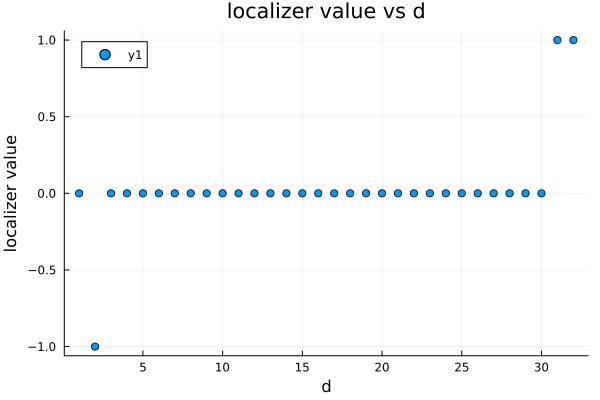

In [861]:
scatter(range(1,Lx,Lx), localizer_vals, xlabel="d", ylabel="localizer value", title="localizer value vs d")

In [862]:
N_PTB

118

In [863]:
# This function generates the value of localizer index at each point in the PTB

localizer_vals_all = zeros(N_PTB);
for ii = 1:N_PTB
    x_value = points_PTB_array_x[ii];
    y_value = points_PTB_array_y[ii];
    d_val = (x_value + y_value)/2;
    dmatrix_shiftedval = dlist_PTB - d_val*const_mat_PTB_orbitals;
    localizer_vals_all[ii] = 0.5 * matrix_signature((dmatrix_shiftedval + im*H_PTB_renor)*chiral_matrix);
    println("localizer_vals[", ii, "] = ", localizer_vals_all[ii])
end

localizer_vals[1] = 0.0
localizer_vals[2] = -1.0
localizer_vals[3] = -1.0
localizer_vals[4] = -1.0
localizer_vals[5] = -1.0
localizer_vals[6] = -1.0
localizer_vals[7] = 0.0
localizer_vals[8] = -1.0
localizer_vals[9] = -1.0
localizer_vals[10] = 0.0
localizer_vals[11] = 0.0
localizer_vals[12] = 0.0
localizer_vals[13] = 0.0
localizer_vals[14] = 0.0
localizer_vals[15] = 0.0
localizer_vals[16] = 0.0
localizer_vals[17] = 0.0
localizer_vals[18] = 0.0
localizer_vals[19] = 0.0
localizer_vals[20] = 0.0
localizer_vals[21] = 0.0
localizer_vals[22] = 0.0
localizer_vals[23] = 0.0
localizer_vals[24] = 0.0
localizer_vals[25] = 0.0
localizer_vals[26] = 0.0
localizer_vals[27] = 0.0
localizer_vals[28] = 0.0
localizer_vals[29] = 0.0
localizer_vals[30] = 0.0
localizer_vals[31] = 0.0
localizer_vals[32] = 0.0
localizer_vals[33] = 0.0
localizer_vals[34] = 0.0
localizer_vals[35] = 0.0
localizer_vals[36] = 0.0
localizer_vals[37] = 0.0
localizer_vals[38] = 0.0
localizer_vals[39] = 0.0
localizer_vals[40] = 0.0
lo

In [864]:
# Define the folder path (relative or absolute)
folder_path = "data/HOTI/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

filename = "t0=$(t0)_t=$(t)_m_0=$(m_0)_Delta=$(Delta)_x_periodic=$(x_periodic)_y_periodic=$(y_periodic)_L=$(L)_m=$(m)_c1=$(c1)_c2=$(c2).csv"


"t0=1.0_t=1.0_m_0=-1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=32_m=0.6180339887498949_c1=-1_c2=2.7.csv"

In [865]:



    local_density_on_lattice_dummy = fill(NaN, Lx*Ly)
    for ii = 1:length(localizer_vals_all)
        local_density_on_lattice_dummy[Int(PTB_index[ii])] = localizer_vals_all[ii]
    end
    density = zeros(Lx,Ly)

    local_density_dummy = copy(local_density_on_lattice_dummy)
    density_dummy_export = zeros(Lx*Ly,3)
	for a = 1:Lx
		for b = 1:Ly
			density_dummy_export[a + (b-1)*Lx,1] = a
            density_dummy_export[a + (b-1)*Lx,2] = b
            density_dummy_export[a + (b-1)*Lx,3] = local_density_dummy[a + (b-1)*Lx]
		end
	end

if exportdata==1
    CSV.write(string(folder_path,"localizer_index/onlyPTB",filename), (; localizer_vals_all),writeheader=false)
end
if exportdata==1
    df = DataFrame(x=density_dummy_export[:,1], y=density_dummy_export[:,2], value=density_dummy_export[:,3])
    CSV.write(string(folder_path,"localizer_index/all",filename), df, writeheader=false)
end

"data/HOTI/localizer_index/allt0=1.0_t=1.0_m_0=-1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=32_m=0.6180339887498949_c1=-1_c2=2.7.csv"

In [ ]:
function plot_anything_in_PTB_to_parent_lattice(v::Array{Float64}, Lx, Ly)
    local_density_on_lattice = fill(NaN, Lx*Ly)
    for ii = 1:length(v)
        local_density_on_lattice[Int(PTB_index[ii])] = v[ii]
    end
    density = zeros(Lx,Ly)

    local_density = copy(local_density_on_lattice)
	for a = 1:Lx
		for b = 1:Ly
			density[a,b] = local_density[a + (b-1)*Lx];
		end
	end

	
	xx = range(1, stop=Lx, length=Lx)
	yy = range(1, stop=Ly, length=Ly)

	xx = repeat(xx, 1, Ly)'
	yy = repeat(yy, 1, Lx)

	# point_size = 500 * vec(density')

plt = scatter(
    vec(xx), vec(yy),
    marker_z = vec(density'),
    color = cgrad([:green, :red, :blue], [-1, 0, 1]), # Custom gradient
    colorbar = true,
    legend = false,
    xlabel = "X",
    ylabel = "Y",
    yguidefontrotation = 270, # Rotates the Y label vertically
    title = "Localizer Index",
    grid = false,
    markerstrokewidth = 0,
    aspect_ratio = 1,
    xlims = (0.5, Lx+0.5),             # Tight x-axis
    ylims = (0.5, Ly+0.5),              # Tight y-axis
    framestyle = :box,           # Box around plot
    xticks = [1, Lx],         # Set x-ticks
    yticks = [1, Ly],          # Set y-ticks
    tickfont = font(16, "Computer Modern"),
    guidefont = font(16, "Computer Modern"),
    titlefont = font(16, "Computer Modern"),
    markersize = 6
)
return plt
end

plot_anything_in_PTB_to_parent_lattice (generic function with 1 method)

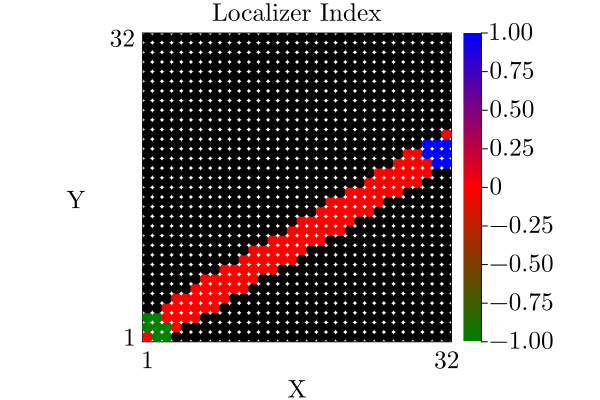

In [867]:
pltplt= plot_anything_in_PTB_to_parent_lattice(localizer_vals_all,Lx,Ly)

In [868]:
N_PTB

118

In [869]:
### Count the number of zeros and ones and minus ones in localizer_vals_all
num_zeros = count(==(0.0), localizer_vals_all)
num_ones = count(==(1.0), localizer_vals_all)
num_minus_ones = count(==(−1.0), localizer_vals_all)
println("Number of zeros in localizer_vals_all: ", num_zeros)
println("Number of ones in localizer_vals_all: ", num_ones)
println("Number of minus ones in localizer_vals_all: ", num_minus_ones)

Number of zeros in localizer_vals_all: 103
Number of ones in localizer_vals_all: 8
Number of minus ones in localizer_vals_all: 7


In [870]:
if exportdata == 1 && pltplt !== nothing
    savefig(pltplt, string(folder_path, "localizer_index/", "localizer_spatial_dist_m=", m, ".pdf"))
else
    println("Warning: pltplt is nothing, not saving figure.")
end

"/work/submit/archi137/Documents/GitHub/lattices-julia/data/HOTI/localizer_index/localizer_spatial_dist_m=0.6180339887498949.pdf"

In [871]:
(energy_eigenvalues_PTB, eigenstates_PTB) = eigen(H_PTB_renor);

In [872]:
size(kron(diagm(ones(N_PTB)),eye2,eye2))

(472, 472)

In [ ]:
println("size H_PTB_renor = ", size(H_PTB_renor))
println("size eigenstates = ", size(eigenstates_PTB))

size H_PTB_renor = (472, 472)
size eigenstates = (472, 472)


In [875]:
Gap_PTB = 2*minimum(abs.(energy_eigenvalues_PTB))

5.175344597319054e-10

In [876]:
energy_eigenvalues_PTB[Int(round(NOrbitalsInside/2))-6:Int(round(NOrbitalsInside/2)+6)]

13-element Vector{Float64}:
 -1.111033315679156
 -1.1100863738770241
 -1.1097731477087323
 -0.9864048222286428
 -0.952800573429915
 -0.8408178017032402
 -2.587672298659527e-10
  0.7057917808664449
  0.9528005756595708
  0.9530231905621972
  0.9864048223923874
  1.1097771215937755
  1.110086422745838

In [877]:
N_PTB, NOrbitalsInside

(118, 472)

## Bulk boundary correspondence

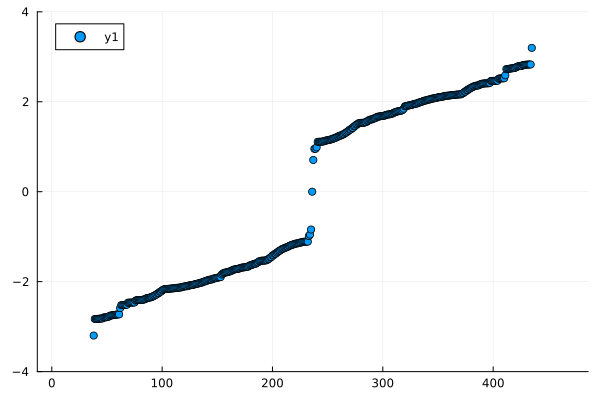

In [878]:
plt2 = scatter(1:NOrbitalsInside, energy_eigenvalues_PTB, ylims=(-4,4))
display(plt2)

In [879]:
energy_eigenvalues_PTB

472-element Vector{Float64}:
     -1.2755954078063866e8
    -11.527350838677819
    -11.441016848296355
    -11.380587067940978
    -11.275632546104168
    -10.73292577472392
    -10.422859327154939
    -10.26537976073935
     -9.352620989610012
     -9.27412222521581
      ⋮
      9.397529292190729
     10.265464847790263
     10.422860117570075
     10.732986869450862
     11.282772425364957
     11.380587538183967
     11.441017286043412
     11.53167649738695
 834440.0005377636

In [880]:
energy_eigenvalues_PTB[2*N_PTB-2], energy_eigenvalues_PTB[2*N_PTB-1], energy_eigenvalues_PTB[2*N_PTB], energy_eigenvalues_PTB[2*N_PTB+1], energy_eigenvalues_PTB[2*N_PTB+2], energy_eigenvalues_PTB[2*N_PTB+3]

(-0.952800573429915, -0.8408178017032402, -2.587672298659527e-10, 0.7057917808664449, 0.9528005756595708, 0.9530231905621972)

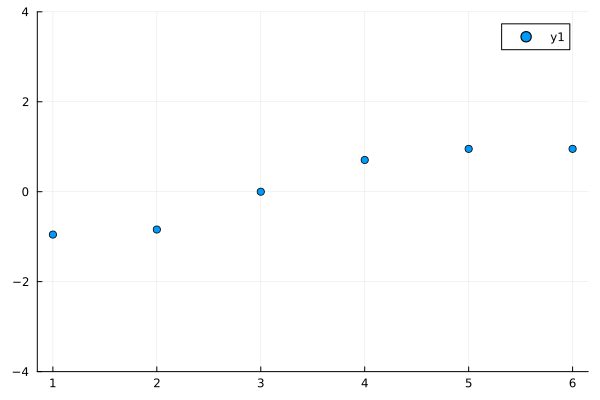

In [881]:
plt2 = scatter(energy_eigenvalues_PTB[Int(round(2*N_PTB))-2:Int(round(2*N_PTB))+3], ylims=(-4,4))

In [882]:
isdir(string(folder_path,"energies/")) || mkdir(string(folder_path,"energies/"))

if exportdata==1
    CSV.write(string(folder_path,"energies/",filename), (; energy_eigenvalues_PTB),writeheader=false)
end

"data/HOTI/energies/t0=1.0_t=1.0_m_0=-1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=32_m=0.6180339887498949_c1=-1_c2=2.7.csv"

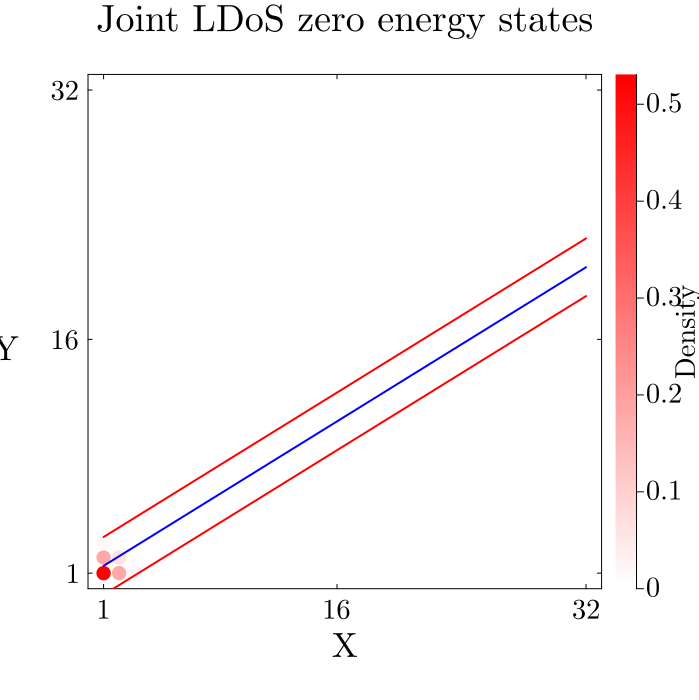

In [883]:
plotPTB_state_in_parent_lattice(eigenstates_PTB[:,2*N_PTB],L,L)

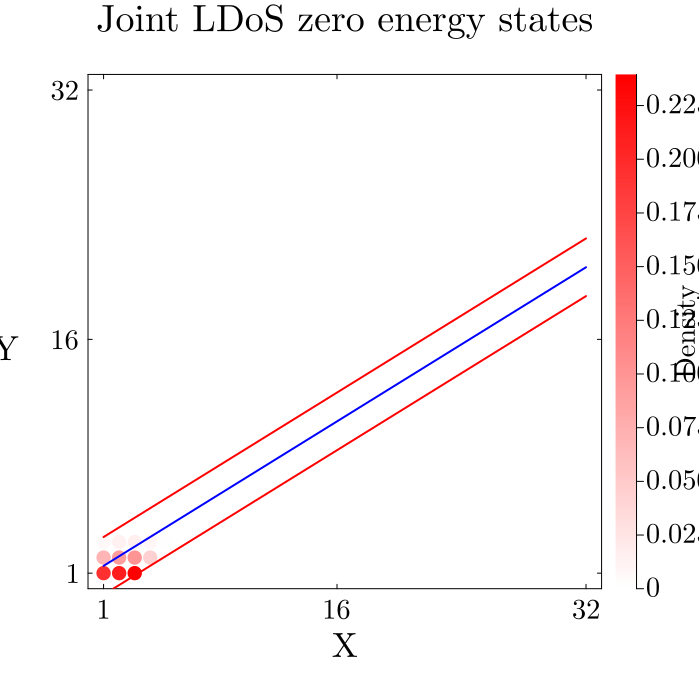

In [884]:
pltzerostate = plotPTB_density_in_parent_lattice(state_to_real_space_LDoS(eigenstates_PTB[:,2*N_PTB+2]),L,L)

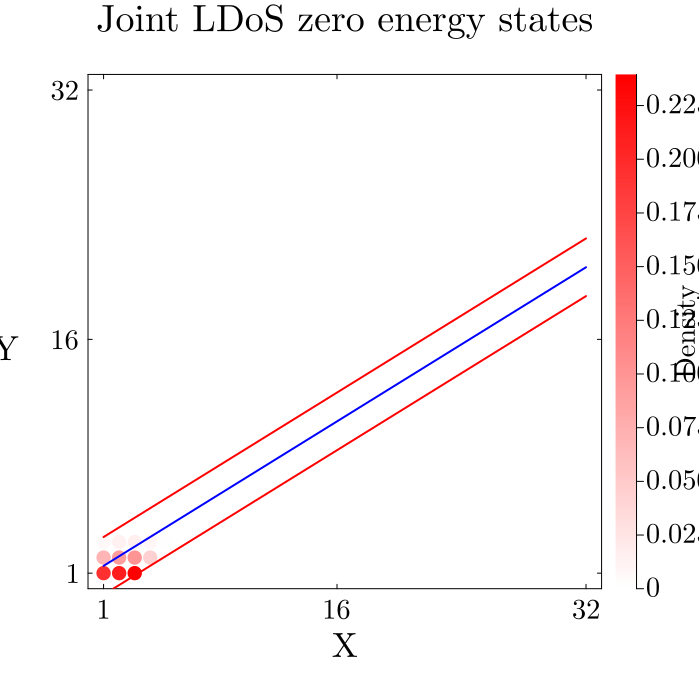

In [885]:
pltzerostate

In [886]:
filename

"t0=1.0_t=1.0_m_0=-1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=32_m=0.6180339887498949_c1=-1_c2=2.7.csv"

In [887]:
savefig(pltzerostate, string(folder_path, "LDOS/", filename,".pdf"))

"/work/submit/archi137/Documents/GitHub/lattices-julia/data/HOTI/LDOS/t0=1.0_t=1.0_m_0=-1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=32_m=0.6180339887498949_c1=-1_c2=2.7.csv.pdf"

## Plot of LDoS of topological states of PTB

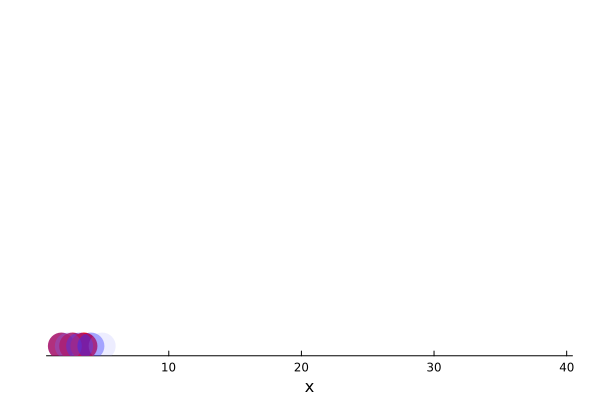

In [888]:
#boundary_state_nearest_zero = eigenstates_PTB[:,N_PTB];
probability_boundary_state = state_to_real_space_LDoS(eigenstates_PTB[:,2*N_PTB+2]);

color_map = cgrad([RGB(1,1,1), RGB(0,0,1), RGB(1,0,0)])

# Calculate alphas based on y values
function alpha_function(p, pmax)
    if p < pmax/10
        return 0
    else
        return p/pmax
    end
end
alphas = alpha_function.(probability_boundary_state, maximum(probability_boundary_state))

#plt_PTB_BD_states = scatter(distance_along_projected_line, probability_boundary_state)
plt_PTB_BD_states = scatter(distance_along_projected_line, ones(N_PTB), 
                            zcolor=probability_boundary_state, legend=false, xlabel="x", colorbar_title="Value",
                            c=color_map, ms=15, seriesalpha=alphas, markerstrokewidth=0, grid=false,
                            yaxis=false)

display(plt_PTB_BD_states)

In [889]:
probability_boundary_state

118-element Vector{Float64}:
 0.1941921878211105
 0.21248254125354354
 0.23950528632138118
 0.06977991643913502
 0.09189382378833992
 0.1006036877955023
 0.04444110038212457
 0.0070782106211528355
 0.013365063895536284
 0.015396741447050326
 ⋮
 4.100278982866677e-17
 8.519785211061759e-17
 2.2144679885370427e-15
 3.654477324760653e-14
 1.3456889827574885e-13
 2.3403595284563315e-15
 3.662553283499399e-14
 1.798485968469176e-13
 6.886493760291762e-13

In [890]:
exportdata

1

In [891]:
isdir(string(folder_path,"LDOS/")) || mkdir(string(folder_path,"LDOS/"))

if exportdata==1
    CSV.write(string(folder_path,"LDOS/",filename), (; probability_boundary_state),writeheader=false)
end

"data/HOTI/LDOS/t0=1.0_t=1.0_m_0=-1.0_Delta=1.0_x_periodic=0_y_periodic=0_L=32_m=0.6180339887498949_c1=-1_c2=2.7.csv"

### Now I isolate sites on the middle line, and plot their local Chern markers

### For each value of x, I find the site on the PTB closest to the middle line

#### Note that this works only if PTB is thick enough to have more than Lx points

In [893]:
### I generate an array which are the points closest to the middle line
middle_line_x_coordinates = 1:Lx;
middle_line_y_coordinates = round.(line_middle.(float(middle_line_x_coordinates)));

In [ ]:
Indices_of_PTB_middle_points = zeros(Lx);
Chern_marker_PTB_list_middle_points = zeros(Lx);

for ii = 1:Lx
    for jj = 1:N_PTB
        if (XList_PTB[jj] == middle_line_x_coordinates[ii]) && (YList_PTB[jj] == middle_line_y_coordinates[ii])
            Indices_of_PTB_middle_points[ii] = PTB_index[jj];
            Chern_marker_PTB_list_middle_points[ii] = ChernMatrixSiteWiseList_PTB[jj];
        end
    end
end


In [ ]:
mode_chern = modes(round.(Chern_marker_PTB_list_middle_points))[1]

In [ ]:
### We will plot the local Chern marker along the line y = Ly/2
plt_Chern_PTB = scatter(1:Lx, Chern_marker_PTB_list_middle_points, ylims=(-3,3), legend=:none,
                xlabel="x", ylabel="PTB Local Chern marker at middle line", 
                title=string("Lx = ", string(Lx), ", t = ", string(t), ", Delta = ", string(Delta), ", m0 = ", string(m_0), ", mu = ", string(mu)))
plt_Chern_PTB = plot!(1:Lx, mode_chern*ones(Lx), linestyle=:dash, thickness=2, linewidth=2)
display(plt_Chern_PTB)

In [897]:
# isdir(string(folder_path,"local_chern/")) || mkdir(string(folder_path,"local_chern/"))

# if exportdata==1
#     CSV.write(string(folder_path,"local_chern/",filename), (; Chern_marker_PTB_list_middle_points),writeheader=false)
# end

In [898]:
t_end=time();

In [899]:
println("time taken = ", t_end - t_start," seconds")

time taken = 115.00898504257202 seconds
